# Introdução

**Recursos Online**
* [More advanced implementation](https://hplgit.github.io/bumpy/doc/pub/._bumpy005.html#___sec6)
* []()

In [1]:
def solver(I, V, m, b, s, F, t, damping = 'linear'):
    """
    Solve m*u'' + f(u') + s(u) = F for time points in t.
    u(0)=I and u'(0)=V,
    by a central finite difference method with time step dt.
    If damping is 'linear', f(u')=b*u, while if damping is
    'quadratic', we have f(u')=b*u'*abs(u').
    s(u) is a Python function, while F may be a function
    or an array (then F[i] corresponds to F at t[i]).
    """
    N = t.size - 1              # No of time intervals
    dt = t[1] - t[0]            # Time step
    u = np.zeros(N+1)           # Result array
    b = float(b); m = float(m)  # Avoid integer division

    # Convert F to array
    if callable(F):
        F = F(t)
    elif isinstance(F, (list,tuple,np.ndarray)):
        F = np.asarray(F)
    else:
        raise TypeError(
            'F must be function or array, not %s' % type(F))

    u[0] = I
    if damping == 'linear':
        u[1] = u[0] + dt*V + dt**2/(2*m)*(-b*V - s(u[0]) + F[0])
    elif damping == 'quadratic':
        u[1] = u[0] + dt*V + dt**2/(2*m)*(-b*V*abs(V) - s(u[0]) + F[0])
    else:
        raise ValueError('Wrong value: damping="%s"' % damping)

    for n in range(1,N):
        if damping == 'linear':
            u[n+1] = (2*m*u[n] + (b*dt/2 - m)*u[n-1] +
                      dt**2*(F[n] - s(u[n])))/(m + b*dt/2)
        elif damping == 'quadratic':
            u[n+1] = (2*m*u[n] - m*u[n-1] + b*u[n]*abs(u[n] - u[n-1])
                      - dt**2*(s(u[n]) - F[n]))/(m + b*abs(u[n] - u[n-1]))
    return u, t

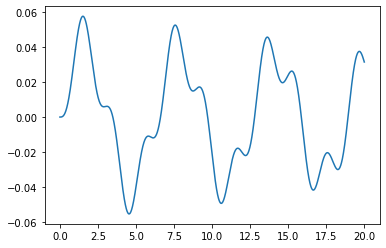

In [3]:
import numpy as np
from numpy import sin, pi  # for nice math

def F(t):
    # Sinusoidal bumpy road
    return A * sin(pi*t)

def s(u):
    return k*u

A = 0.25
k = 2
t = np.linspace(0, 20, 2001)

u, t = solver(I=0, V=0, m=2, b=0.05, s=s, F=F, t=t)

# Show u(t) as a curve plot
import matplotlib.pyplot as plt
plt.plot(t, u)
plt.show()